In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Chapter 2

## (2.1) $\pi$ estimate
Hello World of Monte-Carlo, just for fun. Estimate $\pi$. Let $f(x_1, x_2)$ be 1 inside the quarter cycle in the first quadrant and zero otherwise.  Take $Y=f(x_1, x_2)$. 

### (a)
Use MC sample size of n = 1000 to produce confidence interval for $\mu = E[Y]$ based on CLT. 

In [19]:
def simulation(n_samples):

    gen = np.random.uniform(0, 1, size=(n_samples, 2))

    radius_squared = np.power(gen[:, 0], 2) + np.power(gen[:, 1], 2)

    hits = np.zeros_like(radius_squared)

    hits[radius_squared < 1] = 1

    # Assuming that numerical precision is not an issue
    est_pi = 4*hits.mean()

    std_est_pi = 4*hits.std()

    lower_confidence = pi_est - 1.96*std_est_pi/np.sqrt(n_samples)
    upper_confidence = pi_est + 1.96*std_est_pi/np.sqrt(n_samples)
    
    return est_pi, std_est_pi, lower_confidence, upper_confidence

In [23]:
pi_est, std_est_pi, lower_conf, upper_conf = simulation(1000)
print(f'estimate: {pi_est}')
print(f'standard error: {np.round(std_est_pi, 3)}')
print(f'[{np.round(lower_conf, 3)}, {np.round(upper_conf, 3)}]')

estimate: 3.268
standard error: 1.547
[3.012, 3.204]


### (b) 
Repeat the simulation 1000 times and see how many confidence intervals contain $\pi$

In [28]:
counts = 0
for _ in range(1000):

    pi_est, std_est_pi, lower_conf, upper_conf = simulation(1000)

    if np.pi > lower_conf and np.pi < upper_conf:
        counts+=1

print(counts/1000)

0.947


## (2.14) MC when the mean doesn't exist

When we arrive at a transit station, we can take either a bus or a taxi. The waiting time for a taxi is $X\sim Exp(1)$, while the waiting time for a bus is $Y\sim U(0,1)$, independent of $X$.

### (a)
Prove that $\mathbf{E}[Y/X] = \infty$, so by this measure the bus is infinitely worse than the taxi service

We check the integral:

$$ \mathbf{E}[\frac{Y}{X}] = \mathbf{E}[Y]\mathbf{E}[\frac{1}{X}] = \frac{1}{2} \int_0^\infty dx\, \frac{e^{-x}}{x} = \infty$$

### (b)
Counter the previous part by showing that $\mathbf{E}[\frac{X}{Y}] = \infty$ too.

Again, we check:

$$ \mathbf{E}[\frac{X}{Y}] = \mathbf{E}[\frac{1}{Y}] = \int_0^1 dy\,\frac{1}{y} = \infty $$

### (c) 
Simulate 10,000 $(X, Y)$ pairs and compute the sample mean in each case. Plot sample mean vs. $n$.

In [102]:
def ratio_simulation(num_samples):

    gen_X = -1*np.log(np.random.uniform(0, 1, size=num_samples))
    gen_Y = np.random.uniform(0, 1, size=num_samples)

    ratio = gen_Y/gen_X

    running_mean = ratio.cumsum()/np.arange(1, ratio.shape[0]+1)

    running_variance = np.power(ratio, 2).cumsum()/np.arange(1, ratio.shape[0]+1) - np.power(running_mean, 2)
    running_std = np.sqrt(running_variance)

    running_lower_confidence = running_mean - 3*running_std/np.sqrt(num_samples)
    running_upper_confidence = running_mean + 3*running_std/np.sqrt(num_samples)

    return running_mean, running_std, running_lower_confidence, running_upper_confidence

In [103]:
num_samples = 10000

running_mean, running_std, running_lower_confidence, running_upper_confidence = ratio_simulation(num_samples)

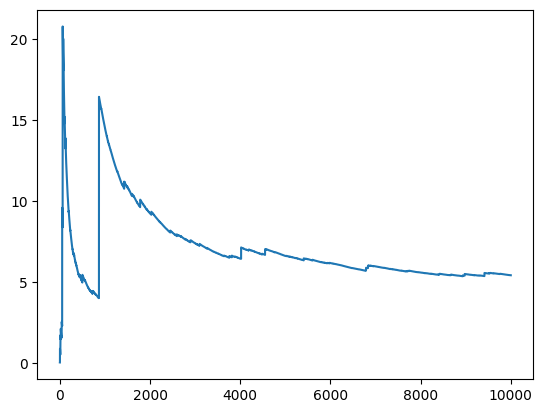

In [104]:
plt.plot(np.arange(1, num_samples+1), running_mean);

One can see large jumps, followed by steady decays. This is characteristic of the MC simulation sampling locations where the random variable is particularly large, followed by sampling regions where there random variable is smaller.

### (d)
Plot the upper and lower limits of the 99% confidence interval

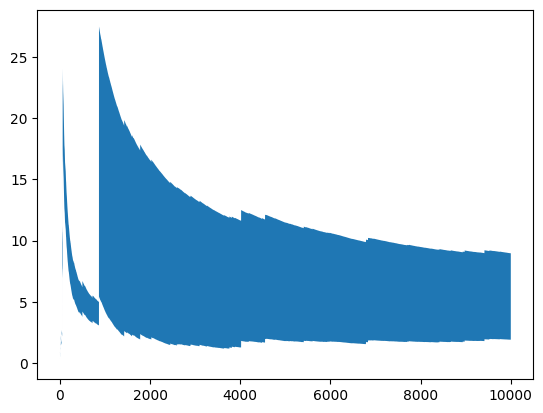

In [105]:
plt.fill_between(np.arange(1, num_samples+1), running_lower_confidence, running_upper_confidence);

Unsuprisingly, the confidence intervlas don't cover the true mean, which is infinite. They do however, shrink as expected from the CLT